In [3]:
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus
import urllib
import requests
import json
import pandas as pd
from datetime import datetime,timedelta

## api에 데이터가 3/2일 정도부터 정상? 이여서 3/2일부터
## 조회 당일까지 데이터 받기
yester = "20200302"
#오늘 날짜
now_today = datetime.today() - timedelta(0)
now_today = now_today.strftime("%Y%m%d") 
print("오늘과 어제 날짜 확인")
print(yester)
print(now_today)
my_api_key = 'GCyZSspoE7iPOuN+4UKO10fOhJyXmQhnhGwke3KcD8v2qaWYLQkoGLNn7vTwbctZkR/3uEECJAykpO4UJxUwTQ=='

url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'

queryParams = '?' + \
'ServiceKey=' + '{}'.format(my_api_key) + \
'&pageNo='+ '1' + \
'&numOfRows='+ '999' + \
'&startCreateDt={}&endCreateDt={}'.format(yester,now_today)



오늘과 어제 날짜 확인
20200302
20211007


In [26]:
import pandas as pd
import seaborn as sns
import platform
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates, ticker

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [148]:
data = pd.read_csv("./CSV/full-list-covid-19-tests-per-day.csv")
corona = pd.read_csv("./CSV/01_corona.csv")

In [10]:
len(data)

53638

In [11]:
data.columns

Index(['Entity', 'Code', 'Day', 'new_tests', '142602-annotations'], dtype='object')

In [149]:
test_cnt = data[data["Code"] == "KOR"]

In [150]:
test_cnt.head(3)

,Entity,Code,Day,new_tests,142602-annotations
44536,South Korea,KOR,2020-01-22,5,people tested
44537,South Korea,KOR,2020-01-27,9,people tested
44538,South Korea,KOR,2020-01-28,130,people tested


In [151]:
corona.head(3)

,날짜,코로나 확진자
0,2020-01-20,1
1,2020-01-21,0
2,2020-01-22,0


In [152]:
len(test_cnt)

515

In [153]:
test_cnt.columns = ["국가", "Code", "날짜", "검사수", "142602-annotations"]

In [155]:
test_cnt["날짜"] = pd.to_datetime(test_cnt["날짜"], format = "%Y-%m-%d")
corona["날짜"] = pd.to_datetime(corona["날짜"], format = "%Y-%m-%d")

/var/folders/t9/yt46lj5s0lv1slvgpm05mrs00000gn/T/ipykernel_89797/744142347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cnt["날짜"] = pd.to_datetime(test_cnt["날짜"], format = "%Y-%m-%d")


In [20]:
test_cnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 44536 to 45050
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   국가                  515 non-null    object        
 1   Code                515 non-null    object        
 2   날짜                  515 non-null    datetime64[ns]
 3   검사수                 515 non-null    int64         
 4   142602-annotations  515 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 24.1+ KB


In [29]:
test_cnt.head(3)

,국가,Code,날짜,검사수,142602-annotations
44536,South Korea,KOR,2020-01-22,5,people tested
44537,South Korea,KOR,2020-01-27,9,people tested
44538,South Korea,KOR,2020-01-28,130,people tested


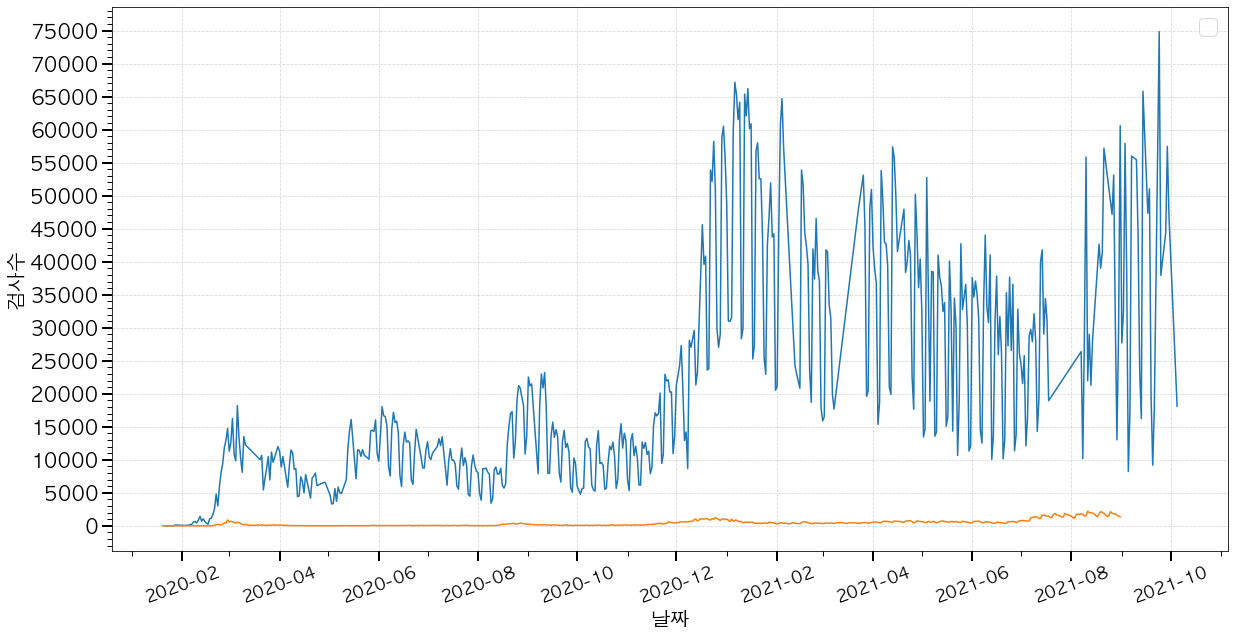

In [41]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.grid(True, axis = "both", alpha = 0.5, linestyle = "--")

ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval = 2))
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_locator(dates.MonthLocator(interval = 1))
# plt.xticks(pd.date_range(start = "2020-01-01", end = "2021-09-01", freq = "MS"))

ax.yaxis.set_major_locator(ticker.MultipleLocator(5000)) ## y값이 0.25의 배수인 경우마다 메인 눈금 표시
# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos:f'{100*x:.0f}%')) ## 메인 눈금 표시형식
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1000)) ## y축 서브 눈금 표시

ax.tick_params(axis = "both", which = "major", length = 10, width = 2)
ax.tick_params(axis = "x", which = "major", labelsize = 17, rotation = 20)
ax.tick_params(axis = "y", which = "major", labelsize = 20)
ax.tick_params(axis = "x", which = "minor", length = 5, width = 1)
ax.tick_params(axis = "y", which = "minor", length = 5, width = 1)

plt.xlabel("날짜", fontsize = 20)
plt.ylabel("검사수", fontsize = 20)

plt.legend(["검사수", "코로나 확진자"], fontsize = 22)

# sns.lineplot(x = "날짜", y = "검사수", data = "test_cnt")
plt.plot(test_cnt["날짜"], test_cnt["검사수"])
plt.plot(corona["날짜"], corona["코로나 확진자"])

In [44]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus

import requests
from bs4 import BeautifulSoup as bs
from urllib import parse
import pandas as pd

In [54]:
# ServiceKey : 공공데이터포털에서 발급받은 서비스키
# startCreateDt : 데이터 생성일 시작범위
# endCreateDt : 데이터 생성일 종료범위

url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'
servicekey = 'GCyZSspoE7iPOuN+4UKO10fOhJyXmQhnhGwke3KcD8v2qaWYLQkoGLNn7vTwbctZkR/3uEECJAykpO4UJxUwTQ=='

params = {"ServiceKey" : parse.unquote(servicekey),
         'startCreateDt' : 20200119,
         "endCreateDt" : 20210901}

url = url + "?"
res = requests.get(url, params = params)
soup = bs(res.text, 'lxml')

In [60]:
print(soup)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><html><body><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><items><item><accdefrate>2.0486116135</accdefrate><accexamcnt>13152138</accexamcnt><accexamcompcnt>12371159</accexamcompcnt><carecnt>26826</carecnt><clearcnt>224319</clearcnt><createdt>2021-09-01 09:37:02.395</createdt><deathcnt>2292</deathcnt><decidecnt>253437</decidecnt><examcnt>780979</examcnt><resutlnegcnt>12117722</resutlnegcnt><seq>621</seq><statedt>20210901</statedt><statetime>00:00</statetime><updatedt>2021-09-19 09:24:03.195</updatedt></item><item><accdefrate>2.036825619</accdefrate><accexamcnt>13094713</accexamcnt><accexamcompcnt>12343472</accexamcompcnt><carecnt>27429</carecnt><clearcnt>221701</clearcnt><createdt>2021-08-31 00:00:00.000</createdt><deathcnt>2285</deathcnt><decidecnt>251415</decidecnt><examcnt>751241</examcnt><resutlnegcnt>12092057</resutlnegcnt><seq>590</seq><statedt>20210831</statedt><statetime>00:00</

In [61]:
# 누적 검사 수      : accExamCnt
# 누적 검사 완료 수  : accExamCompCnt
# 검사진행 수       : examCnt

accexamcnt_data = soup.find_all("accexamcnt")
accexamcompcnt_data = soup.find_all("accexamcompcnt")
examcnt_data = soup.find_all("examcnt")
statedt_data = soup.find_all("statedt")

In [62]:
accexamcnt_list = []
accexamcompcnt_list = []
examcnt_list = []
statedt_list = []

In [64]:
for one in range(len(accexamcnt_data)) :
    accexamcnt_list.append(int(accexamcnt_data[one].text))

for one in range(len(accexamcompcnt_data)) :
    accexamcompcnt_list.append(int(accexamcompcnt_data[one].text))

for one in range(len(examcnt_data)) :
    examcnt_list.append(int(examcnt_data[one].text))
    
for one in range(len(statedt_data)) :
    statedt_list.append(int(statedt_data[one].text))

In [65]:
print("accexamcnt_list len :", len(accexamcnt_list))
print("accexamcompcnt_list len :", len(accexamcompcnt_list))
print("examcnt_list len :", len(examcnt_list))
print("statedt len :", len(statedt_list))

accexamcnt_list len : 590
accexamcompcnt_list len : 590
examcnt_list len : 590
statedt len : 590


In [156]:
corona_dic = {"날짜" : statedt_list, 
              "누적 검사 수" : accexamcnt_list, 
              "누적 검사 완료 수" : accexamcompcnt_list, 
              "검사진행 수" : examcnt_list}
corona_df = pd.DataFrame(corona_dic)
corona_df

,날짜,누적 검사 수,누적 검사 완료 수,검사진행 수
0,20210901,13152138,12371159,780979
1,20210831,13094713,12343472,751241
2,20210830,13049680,12282873,766807
3,20210829,13015923,12253329,762594
4,20210828,12983488,12240311,743177
...,...,...,...,...
585,20200124,29,29,0
586,20200123,25,25,0
587,20200122,21,21,0
588,20200121,15,15,0


In [157]:
# 0901 - 0831 = 57425
# 0829 - 0828 = 
test = []
for i in range(len(corona_df) - 1) :
#     print(corona_df["누적 검사 수"][i])
    test.append(corona_df["누적 검사 수"][i] - corona_df["누적 검사 수"][i + 1])

test.append(0)
print(len(test))

590


In [158]:
print(len(corona_df))

590


In [159]:
corona_df.head(3)

,날짜,누적 검사 수,누적 검사 완료 수,검사진행 수
0,20210901,13152138,12371159,780979
1,20210831,13094713,12343472,751241
2,20210830,13049680,12282873,766807


In [160]:
corona_df["검사수"] = test

In [161]:
corona_df.head(10)

,날짜,누적 검사 수,누적 검사 완료 수,검사진행 수,검사수
0,20210901,13152138,12371159,780979,57425
1,20210831,13094713,12343472,751241,45033
2,20210830,13049680,12282873,766807,33757
3,20210829,13015923,12253329,762594,32435
4,20210828,12983488,12240311,743177,55697
5,20210827,12927791,12209312,718479,60992
6,20210826,12866799,12156200,710599,60189
7,20210825,12806610,12109024,697586,56857
8,20210824,12749753,12061561,688192,55733
9,20210823,12694020,12004777,689243,29686


In [162]:
corona_df["날짜"] = pd.to_datetime(corona_df["날짜"], format = "%Y%m%d")

In [163]:
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          590 non-null    datetime64[ns]
 1   누적 검사 수     590 non-null    int64         
 2   누적 검사 완료 수  590 non-null    int64         
 3   검사진행 수      590 non-null    int64         
 4   검사수         590 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 23.2 KB


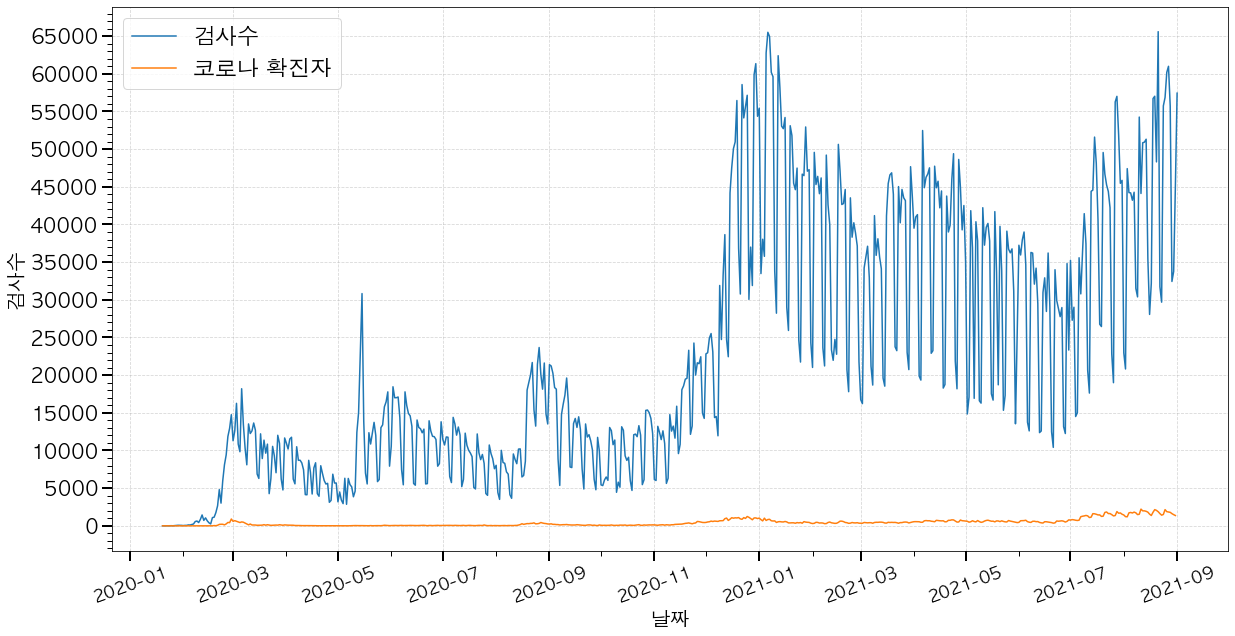

In [164]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.grid(True, axis = "both", alpha = 0.5, linestyle = "--")

ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval = 2))
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_locator(dates.MonthLocator(interval = 1))
# plt.xticks(pd.date_range(start = "2020-01-01", end = "2021-09-01", freq = "MS"))

ax.yaxis.set_major_locator(ticker.MultipleLocator(5000)) ## y값이 0.25의 배수인 경우마다 메인 눈금 표시
# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos:f'{100*x:.0f}%')) ## 메인 눈금 표시형식
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1000)) ## y축 서브 눈금 표시

ax.tick_params(axis = "both", which = "major", length = 10, width = 2)
ax.tick_params(axis = "x", which = "major", labelsize = 17, rotation = 20)
ax.tick_params(axis = "y", which = "major", labelsize = 20)
ax.tick_params(axis = "x", which = "minor", length = 5, width = 1)
ax.tick_params(axis = "y", which = "minor", length = 5, width = 1)

plt.xlabel("날짜", fontsize = 20)
plt.ylabel("검사수", fontsize = 20)

# sns.lineplot(x = "날짜", y = "검사수", data = "test_cnt")
plt.plot(corona_df["날짜"], corona_df["검사수"])
plt.plot(corona["날짜"], corona["코로나 확진자"])

plt.legend(["검사수", "코로나 확진자"], fontsize = 22)

In [165]:
corona_df["검사수_50"] = corona_df["검사수"].rolling(50).mean()

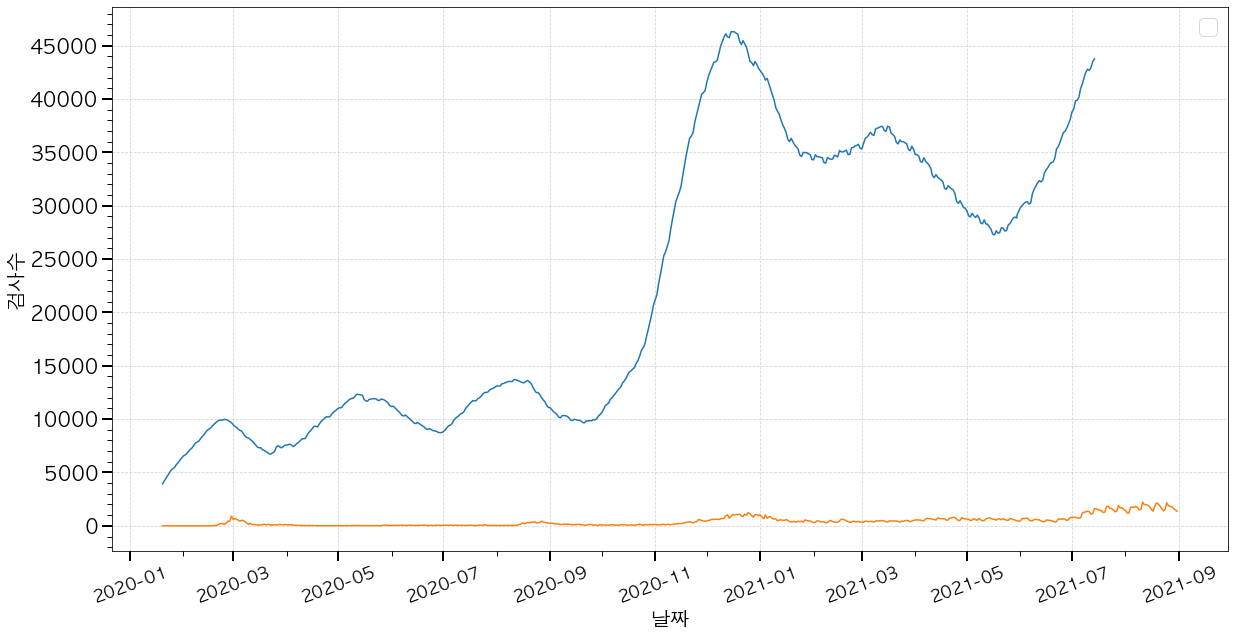

In [166]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.grid(True, axis = "both", alpha = 0.5, linestyle = "--")

ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval = 2))
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_locator(dates.MonthLocator(interval = 1))
# plt.xticks(pd.date_range(start = "2020-01-01", end = "2021-09-01", freq = "MS"))

ax.yaxis.set_major_locator(ticker.MultipleLocator(5000)) ## y값이 0.25의 배수인 경우마다 메인 눈금 표시
# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos:f'{100*x:.0f}%')) ## 메인 눈금 표시형식
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1000)) ## y축 서브 눈금 표시

ax.tick_params(axis = "both", which = "major", length = 10, width = 2)
ax.tick_params(axis = "x", which = "major", labelsize = 17, rotation = 20)
ax.tick_params(axis = "y", which = "major", labelsize = 20)
ax.tick_params(axis = "x", which = "minor", length = 5, width = 1)
ax.tick_params(axis = "y", which = "minor", length = 5, width = 1)

plt.xlabel("날짜", fontsize = 20)
plt.ylabel("검사수", fontsize = 20)

plt.legend(["검사수", "코로나 확진자"], fontsize = 22)

# sns.lineplot(x = "날짜", y = "검사수", data = "test_cnt")
plt.plot(corona_df["날짜"], corona_df["검사수_50"])
plt.plot(corona["날짜"], corona["코로나 확진자"])

In [167]:
corona["코로나(%)"] = corona["코로나 확진자"] / corona["코로나 확진자"].max() * 100
corona_df["검사수(%)"] = corona_df["검사수"] / corona_df["검사수"].max() * 100

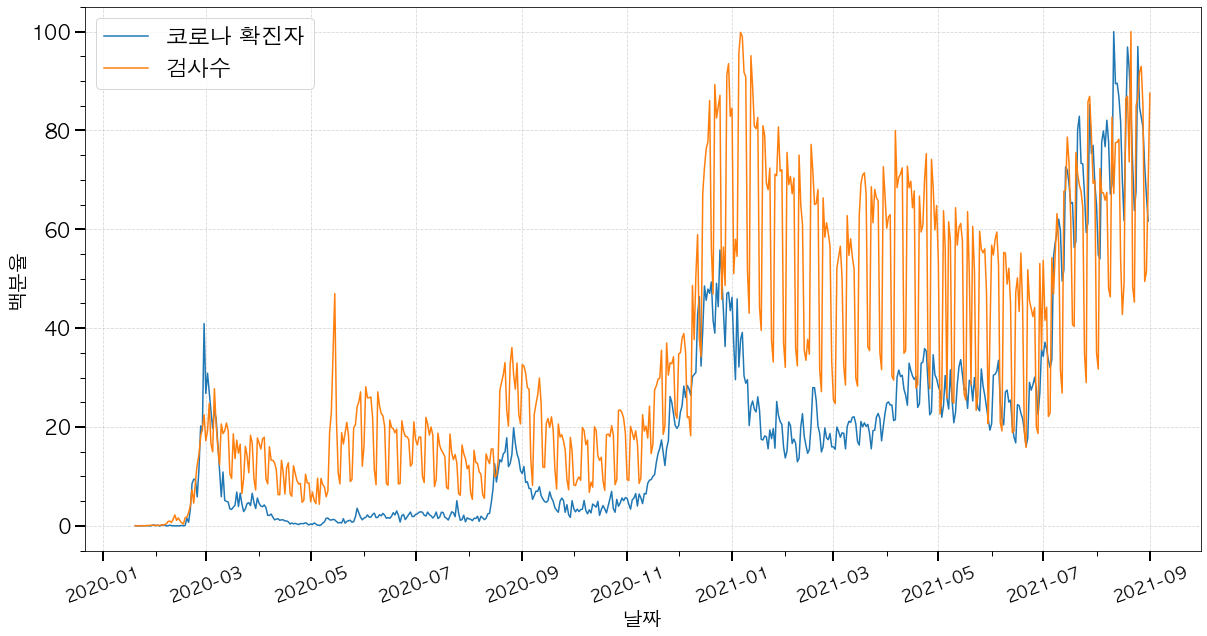

In [168]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.grid(True, axis = "both", alpha = 0.5, linestyle = "--")

ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval = 2))
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_locator(dates.MonthLocator(interval = 1))
# plt.xticks(pd.date_range(start = "2020-01-01", end = "2021-09-01", freq = "MS"))

ax.yaxis.set_major_locator(ticker.MultipleLocator(20)) ## y값이 0.25의 배수인 경우마다 메인 눈금 표시
# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos:f'{100*x:.0f}%')) ## 메인 눈금 표시형식
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5)) ## y축 서브 눈금 표시

ax.tick_params(axis = "both", which = "major", length = 10, width = 2)
ax.tick_params(axis = "x", which = "major", labelsize = 17, rotation = 20)
ax.tick_params(axis = "y", which = "major", labelsize = 20)
ax.tick_params(axis = "x", which = "minor", length = 5, width = 1)
ax.tick_params(axis = "y", which = "minor", length = 5, width = 1)

plt.xlabel("날짜", fontsize = 20)
plt.ylabel("백분율", fontsize = 20)

plt.plot(corona["날짜"], corona["코로나(%)"])
plt.plot(corona_df["날짜"], corona_df["검사수(%)"])

plt.legend(["코로나 확진자", "검사수"], fontsize = 22)

plt.gcf().savefig("./PNG/08_코로나 확진자와 검사수 백분율 비교.png")
plt.show()

In [169]:
corona_df.head(3)

,날짜,누적 검사 수,누적 검사 완료 수,검사진행 수,검사수,검사수_50,검사수(%)
0,2021-09-01,13152138,12371159,780979,57425,NaN,87.550121
1,2021-08-31,13094713,12343472,751241,45033,NaN,68.657285
2,2021-08-30,13049680,12282873,766807,33757,NaN,51.465902


In [170]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       590 non-null    datetime64[ns]
 1   코로나 확진자  590 non-null    int64         
 2   코로나(%)   590 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 14.0 KB


In [171]:
corona_df["검사수(%)_50"] = corona_df["검사수(%)"].rolling(50).mean()
corona["코로나(%)_50"] = corona["코로나(%)"].rolling(50).mean()

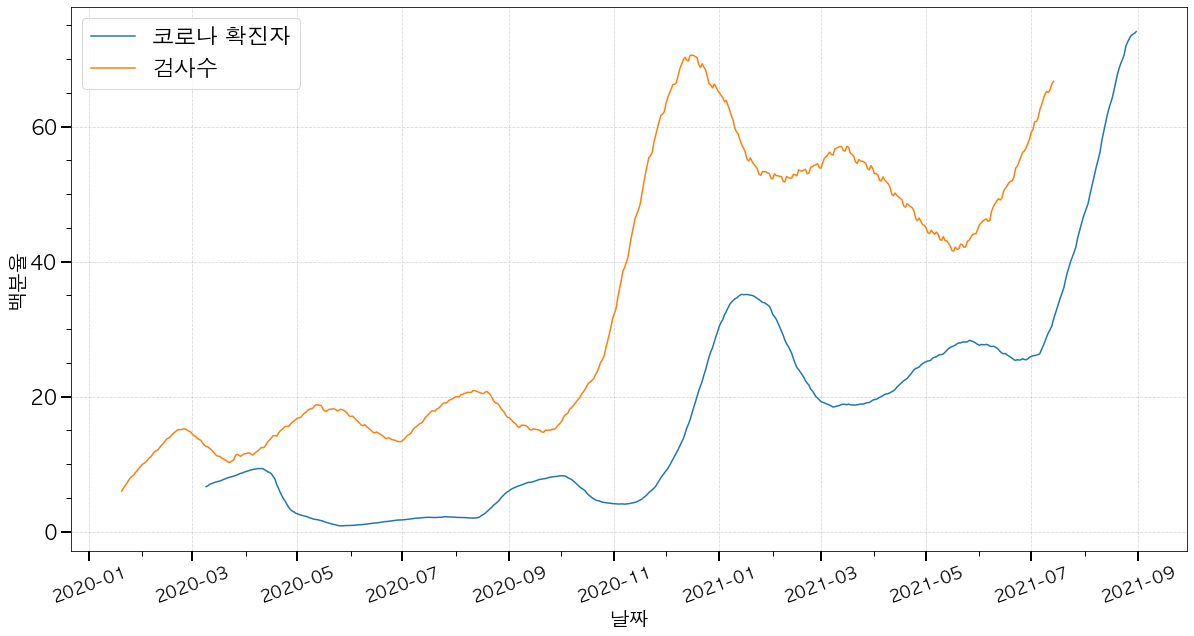

In [172]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.grid(True, axis = "both", alpha = 0.5, linestyle = "--")

ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval = 2))
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_locator(dates.MonthLocator(interval = 1))
# plt.xticks(pd.date_range(start = "2020-01-01", end = "2021-09-01", freq = "MS"))

ax.yaxis.set_major_locator(ticker.MultipleLocator(20)) ## y값이 0.25의 배수인 경우마다 메인 눈금 표시
# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos:f'{100*x:.0f}%')) ## 메인 눈금 표시형식
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5)) ## y축 서브 눈금 표시

ax.tick_params(axis = "both", which = "major", length = 10, width = 2)
ax.tick_params(axis = "x", which = "major", labelsize = 17, rotation = 20)
ax.tick_params(axis = "y", which = "major", labelsize = 20)
ax.tick_params(axis = "x", which = "minor", length = 5, width = 1)
ax.tick_params(axis = "y", which = "minor", length = 5, width = 1)

plt.xlabel("날짜", fontsize = 20)
plt.ylabel("백분율", fontsize = 20)

# plt.plot(corona["날짜"], corona["코로나(%)_50"])
# plt.plot(corona_df["날짜"], corona_df["검사수(%)_50"])
sns.lineplot(x = "날짜", y = "코로나(%)_50", data = corona)
sns.lineplot(x = "날짜", y = "검사수(%)_50", data = corona_df)

plt.legend(["코로나 확진자", "검사수"], fontsize = 22)

plt.gcf().savefig("./PNG/09_코로나 확진자와 검사수 백분율 이동평균선.png")
plt.show()

In [173]:
corona.loc[(corona["날짜"] > "2020-11-25") & (corona["날짜"] < "2020-12-15") ]

,날짜,코로나 확진자,코로나(%),코로나(%)_50
311,2020-11-26,581,26.159388,7.114813
312,2020-11-27,555,24.988744,7.552454
313,2020-11-28,503,22.647456,7.956776
314,2020-11-29,450,20.261144,8.297163
315,2020-11-30,438,19.720846,8.639352
316,2020-12-01,451,20.306168,8.957226
317,2020-12-02,511,23.007654,9.335434
318,2020-12-03,540,24.313372,9.746060
319,2020-12-04,628,28.275552,10.212517
320,2020-12-05,577,25.979289,10.689779


In [174]:
corona_df.loc[(corona_df["날짜"] > "2020-11-25") & (corona_df["날짜"] < "2020-12-15"), ["날짜", "검사수"]]

,날짜,검사수
261,2020-12-14,22444
262,2020-12-13,24731
263,2020-12-12,38651
264,2020-12-11,33265
265,2020-12-10,24727
266,2020-12-09,31903
267,2020-12-08,11949
268,2020-12-07,14509
269,2020-12-06,14371
270,2020-12-05,23080


In [175]:
corona_df.head(10)

,날짜,누적 검사 수,누적 검사 완료 수,검사진행 수,검사수,검사수_50,검사수(%),검사수(%)_50
0,2021-09-01,13152138,12371159,780979,57425,NaN,87.550121,NaN
1,2021-08-31,13094713,12343472,751241,45033,NaN,68.657285,NaN
2,2021-08-30,13049680,12282873,766807,33757,NaN,51.465902,NaN
3,2021-08-29,13015923,12253329,762594,32435,NaN,49.450382,NaN
4,2021-08-28,12983488,12240311,743177,55697,NaN,84.915613,NaN
5,2021-08-27,12927791,12209312,718479,60992,NaN,92.988367,NaN
6,2021-08-26,12866799,12156200,710599,60189,NaN,91.764114,NaN
7,2021-08-25,12806610,12109024,697586,56857,NaN,86.684149,NaN
8,2021-08-24,12749753,12061561,688192,55733,NaN,84.970499,NaN
9,2021-08-23,12694020,12004777,689243,29686,NaN,45.259258,NaN


In [ ]:
3 6
2 3
1 1

6 - 3 = 3